In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DF 불러오기

In [ ]:
df = pd.read_csv('/content/sample_data/전용면적_85초과.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,67600
1,관악구,2016-01-01,105.36,1,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,23,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,37300
2,동작구,2016-01-01,109.70,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,13,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,49000
3,은평구,2016-01-01,134.87,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,74000
4,서초구,2016-01-01,134.36,12,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,11,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,94000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100076,성동구,2022-12-30,148.23,12,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,36,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,180000
100077,용산구,2022-12-30,114.60,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,24,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,215000
100078,강남구,2022-12-30,144.20,8,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,44,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,430000
100079,송파구,2022-12-31,100.82,1,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,185000


# 건물면적 컬럼 제거


In [ ]:
df.drop('건물면적(㎡)',axis=1,inplace=True)

# Train/Test Split


In [ ]:
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])
train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

## feature & target split

In [ ]:
# Train Split
# feature & target  split

X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

# X_train : 숫자형 컬럼만
X_train = X_train_df.select_dtypes([np.number])

In [ ]:
# Test Split
# feature & target  split

X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']

# X_test : 숫자형 컬럼만
X_test = X_test_df.select_dtypes([np.number])

# Scaling
1. Features - minMax
2. Target - Log

In [ ]:
# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)
y_test_scaled

87518     5.033424
87519     5.439333
87520     4.995635
87521     5.332438
87522     5.250420
            ...   
100076    5.255273
100077    5.332438
100078    5.633468
100079    5.267172
100080    5.397940
Name: 물건금액(만원), Length: 12563, dtype: float64

# OLS - Scaling 후

## OLS_1

In [ ]:
# OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1346.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:08:57   Log-Likelihood:                 12087.
No. Observations:               87518   AIC:                        -2.414e+04
Df Residuals:                   87501   BIC:                        -2.398e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5700      0.020    277.876      0.000       5.531       5.609
층                     0.3517      0.007     49.813      0.000       0.338       0.366
KOSPI종가              -0.0806      0.018     -4.605      0.000      -0.115      -0.046
Fed기준금리              -0.2256      0.009    -24.011      0.000      -0.244      -0.207
국제유가(Dubai)($/배럴)     0.1517      0.010     15.663      0.000       0.133       0.171
부동산거래량               -0.0210      0.005     -4.102      0.000      -0.031      -0.011
국고채10년(평균)            0.1689      0.023      7.386      0.000       0.124       0.214
회사채3년(평균)             0.1182      0.014      8.224      0.000       0.090       0.146
CD91물(평균)            -0.2399      0.021    -11.350      0.000      -0.281      -0.198
BOK기준금리              -0.1601      0.017     -9.460      0.000      -0.193      -0.127
건물연식                  0.1270      0.004     33.172      0.000       0.120       0.135
GDP대비가계부채비율          -0.1440      0.016     -8.967      0.000      -0.175      -0.113
환율종가                 -0.0205      0.008     -2.638      0.008      -0.036      -0.005
선행지수순환변동치             0.1968      0.012     15.898      0.000       0.173       0.221
장단기금리spread          -0.4638      0.018    -26.468      0.000      -0.498      -0.429
금값종가                 -0.2091      0.015    -13.602      0.000      -0.239      -0.179
LTV                  -0.4403      0.006    -79.484      0.000      -0.451      -0.429
==============================================================================
Omnibus:                     3446.595   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3979.170
Skew:                           0.475   Prob(JB):                         0.00
Kurtosis:                       3.434   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### EPU 컬럼 삭제

In [ ]:
X_scaled.drop('EPU', axis=1, inplace=True)

## OLS_2

In [ ]:
# OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     1276.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:08:08   Log-Likelihood:                 12152.
No. Observations:               87518   AIC:                        -2.427e+04
Df Residuals:                   87500   BIC:                        -2.410e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4534      0.022    242.525      0.000       5.409       5.497
층                     0.3517      0.007     49.847      0.000       0.338       0.366
KOSPI종가              -0.0721      0.018     -4.118      0.000      -0.106      -0.038
Fed기준금리              -0.1973      0.010    -20.321      0.000      -0.216      -0.178
국제유가(Dubai)($/배럴)     0.1637      0.010     16.812      0.000       0.145       0.183
부동산거래량               -0.0285      0.005     -5.532      0.000      -0.039      -0.018
국고채5년(평균)            -0.5940      0.052    -11.415      0.000      -0.696      -0.492
국고채10년(평균)            0.5136      0.038     13.563      0.000       0.439       0.588
회사채3년(평균)             0.1637      0.015     10.981      0.000       0.134       0.193
CD91물(평균)            -0.1363      0.023     -5.933      0.000      -0.181      -0.091
BOK기준금리              -0.0711      0.019     -3.820      0.000      -0.108      -0.035
건물연식                  0.1256      0.004     32.812      0.000       0.118       0.133
GDP대비가계부채비율          -0.1952      0.017    -11.716      0.000      -0.228      -0.163
환율종가                 -0.0489      0.008     -6.009      0.000      -0.065      -0.033
선행지수순환변동치             0.1774      0.012     14.203      0.000       0.153       0.202
장단기금리spread          -0.2823      0.024    -11.935      0.000      -0.329      -0.236
금값종가                 -0.1672      0.016    -10.588      0.000      -0.198      -0.136
LTV                  -0.4502      0.006    -80.351      0.000      -0.461      -0.439
==============================================================================
Omnibus:                     3443.000   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3981.719
Skew:                           0.474   Prob(JB):                         0.00
Kurtosis:                       3.441   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_2

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif

In [ ]:
# VIF_2
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

     VIF_Factor            Feature
0      4.291249                  층
1    164.466042            KOSPI종가
2     49.758997            Fed기준금리
3     65.861449  국제유가(Dubai)($/배럴)
4      9.679435             부동산거래량
5   1235.392870          국고채5년(평균)
6    850.618945         국고채10년(평균)
7    123.710894          회사채3년(평균)
8    280.216497          CD91물(평균)
9    258.715842            BOK기준금리
10     5.282136               건물연식
11   105.939397        GDP대비가계부채비율
12    22.812740               환율종가
13   126.051974          선행지수순환변동치
14   220.305796        장단기금리spread
15    60.458377               금값종가
16    26.446927                LTV


### 국고채5년(평균) 컬럼삭제

In [ ]:
X_scaled.drop('국고채5년(평균)', axis=1, inplace=True)

## OLS_3

In [ ]:
# OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1346.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:08:41   Log-Likelihood:                 12087.
No. Observations:               87518   AIC:                        -2.414e+04
Df Residuals:                   87501   BIC:                        -2.398e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5700      0.020    277.876      0.000       5.531       5.609
층                     0.3517      0.007     49.813      0.000       0.338       0.366
KOSPI종가              -0.0806      0.018     -4.605      0.000      -0.115      -0.046
Fed기준금리              -0.2256      0.009    -24.011      0.000      -0.244      -0.207
국제유가(Dubai)($/배럴)     0.1517      0.010     15.663      0.000       0.133       0.171
부동산거래량               -0.0210      0.005     -4.102      0.000      -0.031      -0.011
국고채10년(평균)            0.1689      0.023      7.386      0.000       0.124       0.214
회사채3년(평균)             0.1182      0.014      8.224      0.000       0.090       0.146
CD91물(평균)            -0.2399      0.021    -11.350      0.000      -0.281      -0.198
BOK기준금리              -0.1601      0.017     -9.460      0.000      -0.193      -0.127
건물연식                  0.1270      0.004     33.172      0.000       0.120       0.135
GDP대비가계부채비율          -0.1440      0.016     -8.967      0.000      -0.175      -0.113
환율종가                 -0.0205      0.008     -2.638      0.008      -0.036      -0.005
선행지수순환변동치             0.1968      0.012     15.898      0.000       0.173       0.221
장단기금리spread          -0.4638      0.018    -26.468      0.000      -0.498      -0.429
금값종가                 -0.2091      0.015    -13.602      0.000      -0.239      -0.179
LTV                  -0.4403      0.006    -79.484      0.000      -0.451      -0.429
==============================================================================
Omnibus:                     3446.595   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3979.170
Skew:                           0.475   Prob(JB):                         0.00
Kurtosis:                       3.434   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_3

In [ ]:
# VIF_3
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     4.279694                  층
1   162.188446            KOSPI종가
2    43.932312            Fed기준금리
3    65.568724  국제유가(Dubai)($/배럴)
4     9.569580             부동산거래량
5   257.471611         국고채10년(평균)
6   115.009191          회사채3년(평균)
7   273.139286          CD91물(평균)
8   236.483512            BOK기준금리
9     5.250034               건물연식
10   88.895529        GDP대비가계부채비율
11   15.615828               환율종가
12  121.773666          선행지수순환변동치
13  151.977506        장단기금리spread
14   59.659690               금값종가
15   22.139374                LTV


### CD91물(평균) 컬럼 삭제

In [ ]:
X_scaled.drop('CD91물(평균)', axis=1, inplace=True)

## OLS_4

In [ ]:
# OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     1425.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:10:47   Log-Likelihood:                 12022.
No. Observations:               87518   AIC:                        -2.401e+04
Df Residuals:                   87502   BIC:                        -2.386e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4460      0.017    323.751      0.000       5.413       5.479
층                     0.3523      0.007     49.851      0.000       0.338       0.366
KOSPI종가              -0.0291      0.017     -1.718      0.086      -0.062       0.004
Fed기준금리              -0.2423      0.009    -26.088      0.000      -0.260      -0.224
국제유가(Dubai)($/배럴)     0.1554      0.010     16.041      0.000       0.136       0.174
부동산거래량               -0.0279      0.005     -5.484      0.000      -0.038      -0.018
국고채10년(평균)            0.0124      0.018      0.678      0.498      -0.023       0.048
회사채3년(평균)             0.1587      0.014     11.385      0.000       0.131       0.186
BOK기준금리              -0.2639      0.014    -18.529      0.000      -0.292      -0.236
건물연식                  0.1271      0.004     33.165      0.000       0.120       0.135
GDP대비가계부채비율          -0.1332      0.016     -8.302      0.000      -0.165      -0.102
환율종가                 -0.0043      0.008     -0.567      0.571      -0.019       0.011
선행지수순환변동치             0.2452      0.012     21.081      0.000       0.222       0.268
장단기금리spread          -0.4109      0.017    -24.308      0.000      -0.444      -0.378
금값종가                 -0.1983      0.015    -12.910      0.000      -0.228      -0.168
LTV                  -0.4338      0.006    -78.675      0.000      -0.445      -0.423
==============================================================================
Omnibus:                     3536.982   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4096.012
Skew:                           0.482   Prob(JB):                         0.00
Kurtosis:                       3.440   Cond. No.                         79.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 환율종가 컬럼 삭제

In [ ]:
X_scaled.drop('환율종가', axis=1, inplace=True)

## OLS_5

In [ ]:
# OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     1527.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:12:02   Log-Likelihood:                 12022.
No. Observations:               87518   AIC:                        -2.401e+04
Df Residuals:                   87503   BIC:                        -2.387e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4405      0.014    399.222      0.000       5.414       5.467
층                     0.3523      0.007     49.855      0.000       0.338       0.366
KOSPI종가              -0.0263      0.016     -1.623      0.105      -0.058       0.005
Fed기준금리              -0.2432      0.009    -26.590      0.000      -0.261      -0.225
국제유가(Dubai)($/배럴)     0.1575      0.009     17.475      0.000       0.140       0.175
부동산거래량               -0.0280      0.005     -5.503      0.000      -0.038      -0.018
국고채10년(평균)            0.0109      0.018      0.601      0.548      -0.025       0.046
회사채3년(평균)             0.1589      0.014     11.407      0.000       0.132       0.186
BOK기준금리              -0.2621      0.014    -18.861      0.000      -0.289      -0.235
건물연식                  0.1271      0.004     33.164      0.000       0.120       0.135
GDP대비가계부채비율          -0.1343      0.016     -8.442      0.000      -0.166      -0.103
선행지수순환변동치             0.2462      0.012     21.405      0.000       0.224       0.269
장단기금리spread          -0.4100      0.017    -24.358      0.000      -0.443      -0.377
금값종가                 -0.1968      0.015    -13.000      0.000      -0.226      -0.167
LTV                  -0.4336      0.006    -78.822      0.000      -0.444      -0.423
==============================================================================
Omnibus:                     3536.631   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4095.466
Skew:                           0.482   Prob(JB):                         0.00
Kurtosis:                       3.440   Cond. No.                         76.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 국고채10년(평균) 컬럼 삭제

In [ ]:
X_scaled.drop('국고채10년(평균)', axis=1, inplace=True)

## OLS_6

In [ ]:
# OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     1644.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:12:45   Log-Likelihood:                 12022.
No. Observations:               87518   AIC:                        -2.402e+04
Df Residuals:                   87504   BIC:                        -2.388e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4398      0.014    400.412      0.000       5.413       5.466
층                     0.3523      0.007     49.861      0.000       0.338       0.366
KOSPI종가              -0.0282      0.016     -1.775      0.076      -0.059       0.003
Fed기준금리              -0.2419      0.009    -27.147      0.000      -0.259      -0.224
국제유가(Dubai)($/배럴)     0.1572      0.009     17.469      0.000       0.140       0.175
부동산거래량               -0.0281      0.005     -5.547      0.000      -0.038      -0.018
회사채3년(평균)             0.1643      0.011     15.456      0.000       0.143       0.185
BOK기준금리              -0.2599      0.013    -19.394      0.000      -0.286      -0.234
건물연식                  0.1271      0.004     33.172      0.000       0.120       0.135
GDP대비가계부채비율          -0.1345      0.016     -8.453      0.000      -0.166      -0.103
선행지수순환변동치             0.2491      0.010     23.809      0.000       0.229       0.270
장단기금리spread          -0.4070      0.016    -25.351      0.000      -0.438      -0.375
금값종가                 -0.1989      0.015    -13.505      0.000      -0.228      -0.170
LTV                  -0.4334      0.005    -78.928      0.000      -0.444      -0.423
==============================================================================
Omnibus:                     3536.843   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4095.731
Skew:                           0.482   Prob(JB):                         0.00
Kurtosis:                       3.440   Cond. No.                         74.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### KOSPI종가 컬럼 삭제

In [ ]:
X_scaled.drop('KOSPI종가', axis=1, inplace=True)

## OLS_7

In [ ]:
# OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     1781.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:13:18   Log-Likelihood:                 12020.
No. Observations:               87518   AIC:                        -2.401e+04
Df Residuals:                   87505   BIC:                        -2.389e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4374      0.014    402.178      0.000       5.411       5.464
층                     0.3524      0.007     49.870      0.000       0.339       0.366
Fed기준금리              -0.2417      0.009    -27.119      0.000      -0.259      -0.224
국제유가(Dubai)($/배럴)     0.1538      0.009     17.488      0.000       0.137       0.171
부동산거래량               -0.0304      0.005     -6.205      0.000      -0.040      -0.021
회사채3년(평균)             0.1567      0.010     16.101      0.000       0.138       0.176
BOK기준금리              -0.2612      0.013    -19.519      0.000      -0.287      -0.235
건물연식                  0.1271      0.004     33.157      0.000       0.120       0.135
GDP대비가계부채비율          -0.1341      0.016     -8.432      0.000      -0.165      -0.103
선행지수순환변동치             0.2344      0.006     36.537      0.000       0.222       0.247
장단기금리spread          -0.3984      0.015    -26.010      0.000      -0.428      -0.368
금값종가                 -0.2103      0.013    -15.885      0.000      -0.236      -0.184
LTV                  -0.4310      0.005    -80.936      0.000      -0.441      -0.421
==============================================================================
Omnibus:                     3534.985   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4092.346
Skew:                           0.482   Prob(JB):                         0.00
Kurtosis:                       3.439   Cond. No.                         67.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_7

In [ ]:
# VIF_7
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     4.226667                  층
1    41.210203            Fed기준금리
2    52.165194  국제유가(Dubai)($/배럴)
3     8.645429             부동산거래량
4    40.148555          회사채3년(평균)
5    47.329424            BOK기준금리
6     5.173614               건물연식
7    66.681690        GDP대비가계부채비율
8    30.863187          선행지수순환변동치
9   118.498774        장단기금리spread
10   43.592266               금값종가
11   16.685356                LTV


### 장단기금리spread 컬럼 삭제

In [ ]:
X_scaled.drop('장단기금리spread', axis=1, inplace=True)

## OLS_8

In [ ]:
# OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1867.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:13:56   Log-Likelihood:                 11683.
No. Observations:               87518   AIC:                        -2.334e+04
Df Residuals:                   87506   BIC:                        -2.323e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.2610      0.012    448.149      0.000       5.238       5.284
층                     0.3555      0.007     50.130      0.000       0.342       0.369
Fed기준금리              -0.2127      0.009    -23.963      0.000      -0.230      -0.195
국제유가(Dubai)($/배럴)     0.0744      0.008      8.983      0.000       0.058       0.091
부동산거래량               -0.0553      0.005    -11.449      0.000      -0.065      -0.046
회사채3년(평균)            -0.0700      0.004    -16.110      0.000      -0.079      -0.062
BOK기준금리              -0.0909      0.012     -7.756      0.000      -0.114      -0.068
건물연식                  0.1305      0.004     33.937      0.000       0.123       0.138
GDP대비가계부채비율          -0.0400      0.016     -2.572      0.010      -0.070      -0.010
선행지수순환변동치             0.1113      0.004     25.599      0.000       0.103       0.120
금값종가                 -0.1638      0.013    -12.436      0.000      -0.190      -0.138
LTV                  -0.3976      0.005    -76.637      0.000      -0.408      -0.387
==============================================================================
Omnibus:                     3483.308   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4015.822
Skew:                           0.480   Prob(JB):                         0.00
Kurtosis:                       3.425   Cond. No.                         55.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_8

In [ ]:
# VIF_8
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     4.204337                  층
1    38.860455            Fed기준금리
2    47.618260  국제유가(Dubai)($/배럴)
3     7.860685             부동산거래량
4    10.340572          회사채3년(평균)
5    46.308902            BOK기준금리
6     5.158278               건물연식
7    66.189402        GDP대비가계부채비율
8    14.714433          선행지수순환변동치
9    43.584715               금값종가
10   16.456624                LTV


### GDP대비가계부채비율 컬럼 삭제

In [ ]:
X_scaled.drop('GDP대비가계부채비율', axis=1, inplace=True)

## OLS_9

In [ ]:
# OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     2053.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:14:36   Log-Likelihood:                 11680.
No. Observations:               87518   AIC:                        -2.334e+04
Df Residuals:                   87507   BIC:                        -2.324e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.2445      0.010    533.500      0.000       5.225       5.264
층                     0.3558      0.007     50.168      0.000       0.342       0.370
Fed기준금리              -0.2250      0.007    -30.173      0.000      -0.240      -0.210
국제유가(Dubai)($/배럴)     0.0708      0.008      8.675      0.000       0.055       0.087
부동산거래량               -0.0557      0.005    -11.545      0.000      -0.065      -0.046
회사채3년(평균)            -0.0731      0.004    -17.507      0.000      -0.081      -0.065
BOK기준금리              -0.0697      0.008     -8.357      0.000      -0.086      -0.053
건물연식                  0.1303      0.004     33.895      0.000       0.123       0.138
선행지수순환변동치             0.1127      0.004     26.162      0.000       0.104       0.121
금값종가                 -0.1852      0.010    -18.147      0.000      -0.205      -0.165
LTV                  -0.3924      0.005    -82.002      0.000      -0.402      -0.383
==============================================================================
Omnibus:                     3491.246   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4023.265
Skew:                           0.481   Prob(JB):                         0.00
Kurtosis:                       3.423   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_9

In [ ]:
# VIF_9
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor            Feature
0    4.163942                  층
1   29.279277            Fed기준금리
2   45.996987  국제유가(Dubai)($/배럴)
3    7.471868             부동산거래량
4    9.624666          회사채3년(평균)
5   33.481871            BOK기준금리
6    5.068059               건물연식
7   14.684479          선행지수순환변동치
8    7.344821               금값종가
9   16.360773                LTV


### 국제유가(Dubai)($/배럴) 컬럼 삭제

In [ ]:
X_scaled.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

## OLS_10

In [ ]:
# OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     2271.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:15:10   Log-Likelihood:                 11642.
No. Observations:               87518   AIC:                        -2.326e+04
Df Residuals:                   87508   BIC:                        -2.317e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2516      0.010    535.849      0.000       5.232       5.271
층              0.3553      0.007     50.085      0.000       0.341       0.369
Fed기준금리       -0.1868      0.006    -31.027      0.000      -0.199      -0.175
부동산거래량        -0.0449      0.005     -9.620      0.000      -0.054      -0.036
회사채3년(평균)     -0.0605      0.004    -15.446      0.000      -0.068      -0.053
BOK기준금리       -0.0646      0.008     -7.760      0.000      -0.081      -0.048
건물연식           0.1302      0.004     33.856      0.000       0.123       0.138
선행지수순환변동치      0.1166      0.004     27.190      0.000       0.108       0.125
금값종가          -0.1817      0.010    -17.811      0.000      -0.202      -0.162
LTV           -0.3916      0.005    -81.809      0.000      -0.401      -0.382
==============================================================================
Omnibus:                     3516.653   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4056.867
Skew:                           0.483   Prob(JB):                         0.00
Kurtosis:                       3.425   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_10

In [ ]:
# VIF_10
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.163578          층
1   18.800535    Fed기준금리
2    6.768714     부동산거래량
3    8.412239  회사채3년(평균)
4   32.505375    BOK기준금리
5    5.066914       건물연식
6   14.492354  선행지수순환변동치
7    7.008188       금값종가
8   16.269579        LTV


###  BOK기준금리 컬럼 삭제

In [ ]:
X_scaled.drop('BOK기준금리', axis=1, inplace=True)

## OLS_11

In [ ]:
# OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     2545.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:16:03   Log-Likelihood:                 11612.
No. Observations:               87518   AIC:                        -2.321e+04
Df Residuals:                   87509   BIC:                        -2.312e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1998      0.007    723.378      0.000       5.186       5.214
층              0.3553      0.007     50.072      0.000       0.341       0.369
Fed기준금리       -0.2130      0.005    -42.692      0.000      -0.223      -0.203
부동산거래량        -0.0300      0.004     -7.054      0.000      -0.038      -0.022
회사채3년(평균)     -0.0589      0.004    -15.056      0.000      -0.067      -0.051
건물연식           0.1308      0.004     33.994      0.000       0.123       0.138
선행지수순환변동치      0.1238      0.004     29.554      0.000       0.116       0.132
금값종가          -0.1335      0.008    -16.494      0.000      -0.149      -0.118
LTV           -0.3957      0.005    -83.149      0.000      -0.405      -0.386
==============================================================================
Omnibus:                     3523.637   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4067.840
Skew:                           0.483   Prob(JB):                         0.00
Kurtosis:                       3.428   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_11

In [ ]:
# VIF_11
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.019546          층
1    3.778252    Fed기준금리
2    6.413925     부동산거래량
3    8.410699  회사채3년(평균)
4    4.912801       건물연식
5   14.048084  선행지수순환변동치
6    6.981324       금값종가
7    7.121541        LTV


### 선행지수순환변동치 컬럼 삭제

In [ ]:
X_scaled.drop('선행지수순환변동치', axis=1, inplace=True)

In [ ]:
# OLS_12
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     2757.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:16:27   Log-Likelihood:                 11178.
No. Observations:               87518   AIC:                        -2.234e+04
Df Residuals:                   87510   BIC:                        -2.226e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1950      0.007    719.313      0.000       5.181       5.209
층              0.3598      0.007     50.453      0.000       0.346       0.374
Fed기준금리       -0.2063      0.005    -41.181      0.000      -0.216      -0.196
부동산거래량        -0.0216      0.004     -5.058      0.000      -0.030      -0.013
회사채3년(평균)      0.0257      0.003      9.605      0.000       0.020       0.031
건물연식           0.1308      0.004     33.849      0.000       0.123       0.138
금값종가          -0.1478      0.008    -18.212      0.000      -0.164      -0.132
LTV           -0.3383      0.004    -77.481      0.000      -0.347      -0.330
==============================================================================
Omnibus:                     3418.736   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3895.792
Skew:                           0.482   Prob(JB):                         0.00
Kurtosis:                       3.374   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_12

In [ ]:
# VIF_12
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.018593          층
1    3.769184    Fed기준금리
2    6.387253     부동산거래량
3    3.897239  회사채3년(평균)
4    4.912645       건물연식
5    6.877299       금값종가
6    3.763900        LTV


# LinearRegression

## CV - R2, MSE

In [ ]:
# X_test 컬럼 -> X_scaled 기준(train)으로 맞추기
X_test_scaled=X_test_scaled[X_scaled.columns]

## 교차검증

In [ ]:
# CV

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(model, X_scaled, y_scaled,
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5,
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error']

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.18089,           Validation Score_r2 = -0.00743
      Train Score_mse = 0.04525,           Validation Score_mse = 0.04679


Fold 2: Train Score_r2 = 0.20976,           Validation Score_r2 = -0.06091
      Train Score_mse = 0.04467,           Validation Score_mse = 0.04959


Fold 3: Train Score_r2 = 0.2142,           Validation Score_r2 = -0.00238
      Train Score_mse = 0.04458,           Validation Score_mse = 0.04957


Fold 4: Train Score_r2 = 0.20657,           Validation Score_r2 = 0.0125
      Train Score_mse = 0.04221,           Validation Score_mse = 0.05846


Fold 5: Train Score_r2 = 0.09533,           Validation Score_r2 = -0.19288
      Train Score_mse = 0.04843,           Validation Score_mse = 0.0604


CV 평균 R2 : -0.0502
CV 평균 MSE : 0.053


# 평가지표 train and test 시각화

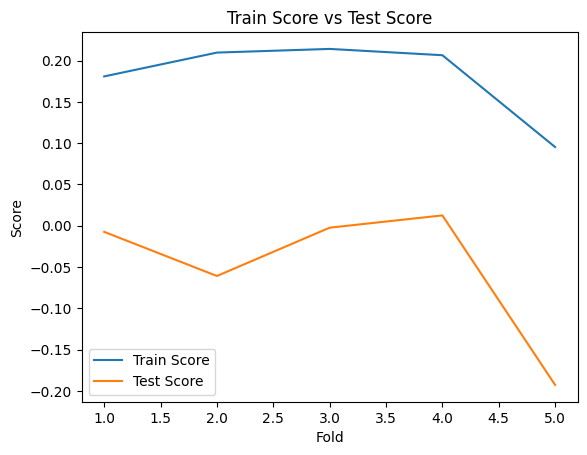

In [ ]:
# R2
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

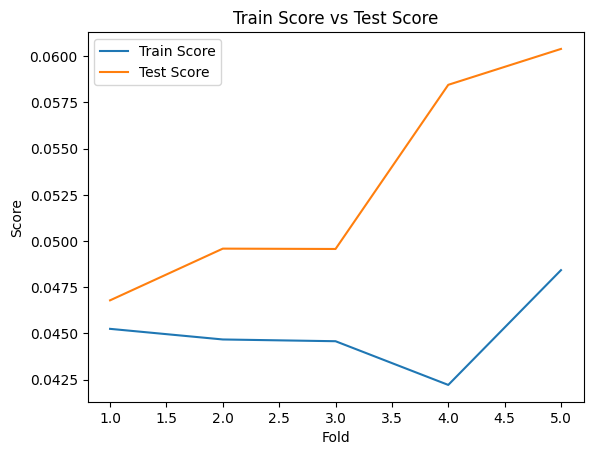

In [ ]:
# MSE
import matplotlib.pyplot as plt

train_scores = -cv_results['train_neg_mean_squared_error']
test_scores = -cv_results['test_neg_mean_squared_error']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

# Model 확정
- R2 그래프상 train & test 점수차이가 가장 적게 나는 모델 확정
- 최종 네 번째로 확정

In [ ]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][3].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.049, RMSE :  0.222, MAE: 0.222
Variance score :  0.210




In [ ]:
# test 계수 결과 DF

test_result = pd.DataFrame(data= cv_results['estimator'][3].coef_, index = X_scaled.columns)

test_result.columns = ['회귀계수']

test_result.sort_values('회귀계수', ascending=False)

,회귀계수
층,0.348101
건물연식,0.117769
회사채3년(평균),0.014925
부동산거래량,-0.021661
금값종가,-0.224263
Fed기준금리,-0.246076
LTV,-0.394380


# Ridge & Lasso

## Ridge

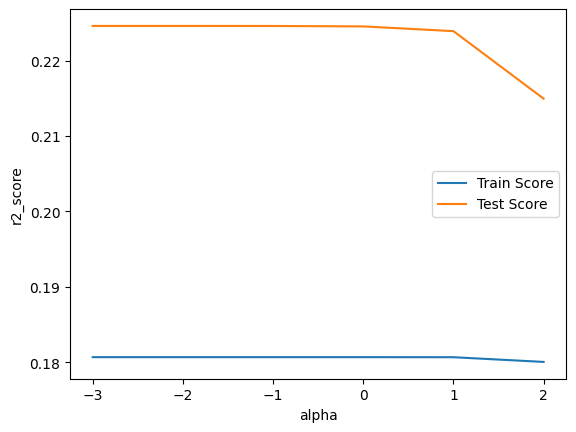

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_scaled)
    train_score.append(ridge.score(X_scaled, y_scaled))
    test_score.append(ridge.score(X_test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_list), train_score, label='Train Score')
plt.plot(np.log10(alpha_list), test_score, label='Test Score')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.legend()
plt.show()

- 기본값 alpha = 1.0으로 진행 (alpha = 100은 규제를 너무 심하게 주는 것이라 생각)

# CV

In [ ]:
# CV

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(ridge, X_scaled, y_scaled,
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5,
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error']

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.18089,           Validation Score_r2 = -0.00729
      Train Score_mse = 0.04525,           Validation Score_mse = 0.04679


Fold 2: Train Score_r2 = 0.20976,           Validation Score_r2 = -0.06077
      Train Score_mse = 0.04467,           Validation Score_mse = 0.04958


Fold 3: Train Score_r2 = 0.2142,           Validation Score_r2 = -0.00236
      Train Score_mse = 0.04458,           Validation Score_mse = 0.04957


Fold 4: Train Score_r2 = 0.20657,           Validation Score_r2 = 0.01258
      Train Score_mse = 0.04221,           Validation Score_mse = 0.05845


Fold 5: Train Score_r2 = 0.09533,           Validation Score_r2 = -0.19258
      Train Score_mse = 0.04843,           Validation Score_mse = 0.06038


CV 평균 R2 : -0.0501
CV 평균 MSE : 0.053


# 평가지표 train and test 차이 시각화

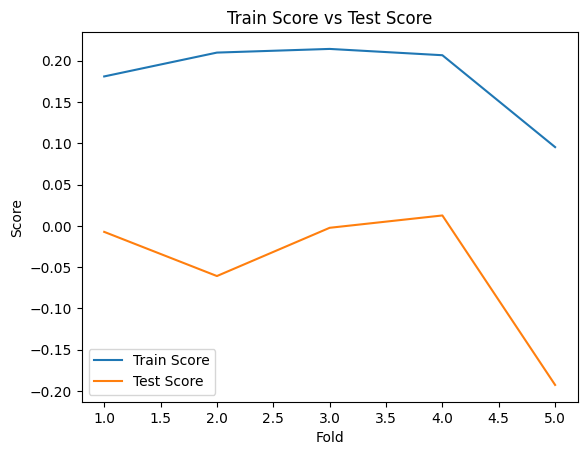

In [ ]:
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

In [ ]:
# ridge의 train, test r2 확인
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
print(ridge.score(X_scaled, y_scaled))
print(ridge.score(X_test_scaled, y_test_scaled))

0.18066066819428572
0.2245418650130322


In [ ]:
# 최종 모델 - Predict & 평가지표
# Train 전체로 학습 시
ridge.fit(X_scaled, y_scaled)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.048, RMSE :  0.220, MAE: 0.220
Variance score :  0.225




In [ ]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][3].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.049, RMSE :  0.222, MAE: 0.222
Variance score :  0.210




In [ ]:
# Ridge 회귀계수
ridge_df = pd.DataFrame(data = cv_results['estimator'][3].coef_, index = X_scaled.columns)
ridge_df.columns = ['회귀계수']
ridge_df.sort_values(by = '회귀계수',ascending=False)

,회귀계수
층,0.347620
건물연식,0.117658
회사채3년(평균),0.014851
부동산거래량,-0.021778
금값종가,-0.223373
Fed기준금리,-0.245553
LTV,-0.393931
